In [4]:
import pyart
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [27]:
file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230420_neumayer_mira.nc'
dayFile = nc.Dataset(file_path)

dbz = np.array(dayFile.variables['Zh'])
dbz[dbz > 1000] = np.nan
z = 10 ** (dbz / 10)
height = np.array(dayFile.variables['height'])
time = np.array(dayFile.variables['time'])

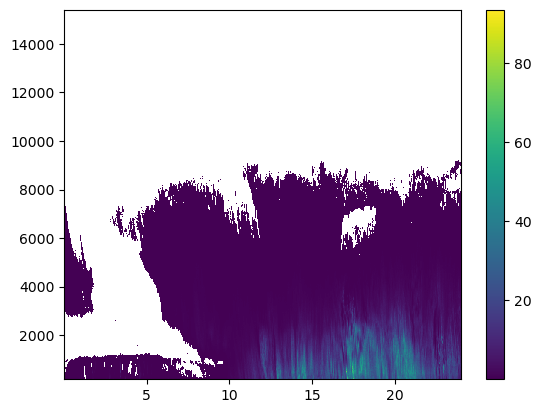

In [28]:
T, H = np.meshgrid(time, height)
plt.pcolormesh(time, height, z.T, shading='auto')
plt.colorbar()
#plt.ylim(top=500)

In [40]:
# Empirical constants from Makrosov et al. (2022), Souverijns et al. (2017)
aLower = 11
aHigher = 63
b = 1.2

precipLower = (z / aHigher) ** (1 / b)
precipHigher = (z / aLower) ** (1 / b)

T, H = np.meshgrid(time, height)

Text(0.5, 1.0, 'Radar reflectivity precipitation')

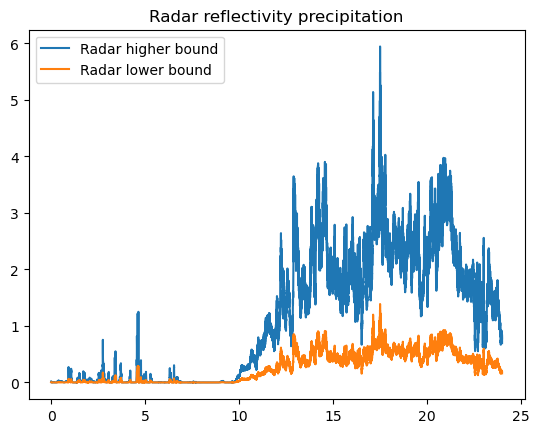

In [42]:
plt.plot(time, precipHigher[:, 0], label='Radar higher bound')
plt.plot(time, precipLower[:, 0], label='Radar lower bound')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [ ]:
dis_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230420_neumayer_parsivel_0bc7d487.nc'